Objektif yang ingin dicapai antara lain:

- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi total_jumlah_transaksi.
- Dapat memprediksi total_jumlah_transaksi berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode regresi linier.

# IMPORT PUSTAKA

In [1]:
# Import Pustaka
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# DATA LOADING

In [2]:
# Read Dataset
df = pd.read_csv('dummy-transaksi-ojol-need-clean.csv', sep=';')

# Menampilkan dataset
df

,id,date,mode,from_alamat,from_kelurahan,from_kecamatan,from_latlng,to_alamat,to_kelurahan,to_kecamatan,...,customer_gender,customer_birthdate,driver_id,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
0,1617,2019/03/09 20:45 s/d 2019/03/09 19:55,BIKE,"Gang Ikhwan No.16, Sungai Jawi",DARAT SEKIP,PONTIANAK KOTA,"-0,0303277,109,297753","Jl. Prof. M.Yamin No.3a, Sungai Bangkong",BENUA MELAYU LAUT,PONTIANAK SELATAN,...,P,1994-02-05T00:00:00,90,L,1997-03-24T00:00:00,MOTOR,Yamaha,NaN,NaN,NaN
1,1297,2019/03/09 19:55 s/d 2019/03/09 19:54,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,02861,109,329253","Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",BANJAR SERASAN,PONTIANAK TIMUR,...,L,2004-04-22T00:00:00,77,L,1976-07-26T00:00:00,MOTOR,BMW,93.0,"Neo Shabu-Shabu Steak & Shake, Johar",RESTAURANT
2,1394,2019/03/09 19:54 s/d 2019/03/09 18:56,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",DARAT SEKIP,PONTIANAK KOTA,"-0,0301863,109,3356331","Gg. Gn. Malabar No.21, Sungai Jawi",SUNGAI BELIUNG,PONTIANAK BARAT,...,L,2000-01-07T00:00:00,75,L,1985-12-28T00:00:00,MOTOR,TVS,421.0,Alfamart Pontianak Mall,TOKO/SWALAYAN
3,1120,2019/03/09 18:56 s/d 2019/03/09 12:28,FOOD,"Parklife, Jl. Karimata No.64, Sungai Bangkong,...",MARIANA,PONTIANAK KOTA,"-0,0305815,109,3264009","Unnamed Road, Pal IX",BANGKA BELITUNG DARAT,PONTIANAK TENGGARA,...,L,1987-08-02T00:00:00,82,L,1993-06-10T00:00:00,MOTOR,Suzuki,109.0,Parklife,CAFE
4,2053,2019/03/09 12:28 s/d 2019/03/08 18:25,CAR,"Jl. Tabrani Ahmad No.12, Sungai Jawi Dalam",PAL LIMA,PONTIANAK BARAT,"-0,018461872,109,3075679","Pal IX, Kakap River",BANSIR LAUT,PONTIANAK TENGGARA,...,L,2004-01-23T00:00:00,109,P,1988-05-02T00:00:00,MOBIL,Honda,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1639,2018/09/10 18:28 s/d 2018/09/10 15:29,BIKE,"Gg. Metal, Siantan Hulu",SIANTAN HILIR,PONTIANAK UTARA,"-0,006927295,109,3522482","Gang Jaya Makmur, Kota Baru",KOTA BARU,PONTIANAK SELATAN,...,L,2004-04-22T00:00:00,77,L,1976-07-26T00:00:00,MOTOR,BMW,NaN,NaN,NaN
1013,1123,2018/09/10 15:29 s/d 2018/09/10 14:27,FOOD,"Mekuru Ramen House, Jl. Ketapang No.31, Benua ...",BENUA MELAYU LAUT,PONTIANAK SELATAN,"-0,0331539,109,344327","Jl. Kebangkitan Nasional, Siantan Hulu",BATU LAYANG,PONTIANAK UTARA,...,P,1985-12-24T00:00:00,81,L,1991-09-08T00:00:00,MOTOR,BMW,82.0,Mekuru Ramen House,RESTAURANT
1014,1242,2018/09/10 14:27 s/d 2018/09/10 10:30,FOOD,"Pondok Ale-ale, Gg. Suka Damai No.21, Sungai B...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,03718,109,325818","Jl. Swadaya, Pal IX",BANGKA BELITUNG LAUT,PONTIANAK TENGGARA,...,L,2002-03-26T00:00:00,93,L,1984-12-26T00:00:00,MOTOR,TVS,16.0,Pondok Ale-ale,RESTAURANT
1015,1779,2018/09/10 10:30 s/d 2018/09/10 09:12,BIKE,"Gg. Dharma Putra 17A, Siantan Hilir",SIANTAN TENGAH,PONTIANAK UTARA,"-0,003775875,109,3458342","Gg. Losari No.16, Sungai Jawi",SUNGAI JAWI LUAR,PONTIANAK BARAT,...,P,1987-07-18T00:00:00,80,L,1987-03-29T00:00:00,MOTOR,TVS,NaN,NaN,NaN


In [3]:
# Menampilkan informasi tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1017 non-null   int64  
 1   date                      1017 non-null   object 
 2   mode                      1017 non-null   object 
 3   from_alamat               1017 non-null   object 
 4   from_kelurahan            1017 non-null   object 
 5   from_kecamatan            1017 non-null   object 
 6   from_latlng               1017 non-null   object 
 7   to_alamat                 1014 non-null   object 
 8   to_kelurahan              1017 non-null   object 
 9   to_kecamatan              1017 non-null   object 
 10  to_latlng                 1017 non-null   object 
 11  distance                  1017 non-null   float64
 12  amount_delivery           1017 non-null   int64  
 13  amount_merchant           1017 non-null   int64  
 14  transact

In [4]:
# Melihat bentuk dari dataset
df.shape

(1017, 26)

In [5]:
# Melihat 5 Data teratas
df.head()

,id,date,mode,from_alamat,from_kelurahan,from_kecamatan,from_latlng,to_alamat,to_kelurahan,to_kecamatan,...,customer_gender,customer_birthdate,driver_id,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
0,1617,2019/03/09 20:45 s/d 2019/03/09 19:55,BIKE,"Gang Ikhwan No.16, Sungai Jawi",DARAT SEKIP,PONTIANAK KOTA,"-0,0303277,109,297753","Jl. Prof. M.Yamin No.3a, Sungai Bangkong",BENUA MELAYU LAUT,PONTIANAK SELATAN,...,P,1994-02-05T00:00:00,90,L,1997-03-24T00:00:00,MOTOR,Yamaha,NaN,NaN,NaN
1,1297,2019/03/09 19:55 s/d 2019/03/09 19:54,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,02861,109,329253","Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",BANJAR SERASAN,PONTIANAK TIMUR,...,L,2004-04-22T00:00:00,77,L,1976-07-26T00:00:00,MOTOR,BMW,93.0,"Neo Shabu-Shabu Steak & Shake, Johar",RESTAURANT
2,1394,2019/03/09 19:54 s/d 2019/03/09 18:56,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",DARAT SEKIP,PONTIANAK KOTA,"-0,0301863,109,3356331","Gg. Gn. Malabar No.21, Sungai Jawi",SUNGAI BELIUNG,PONTIANAK BARAT,...,L,2000-01-07T00:00:00,75,L,1985-12-28T00:00:00,MOTOR,TVS,421.0,Alfamart Pontianak Mall,TOKO/SWALAYAN
3,1120,2019/03/09 18:56 s/d 2019/03/09 12:28,FOOD,"Parklife, Jl. Karimata No.64, Sungai Bangkong,...",MARIANA,PONTIANAK KOTA,"-0,0305815,109,3264009","Unnamed Road, Pal IX",BANGKA BELITUNG DARAT,PONTIANAK TENGGARA,...,L,1987-08-02T00:00:00,82,L,1993-06-10T00:00:00,MOTOR,Suzuki,109.0,Parklife,CAFE
4,2053,2019/03/09 12:28 s/d 2019/03/08 18:25,CAR,"Jl. Tabrani Ahmad No.12, Sungai Jawi Dalam",PAL LIMA,PONTIANAK BARAT,"-0,018461872,109,3075679","Pal IX, Kakap River",BANSIR LAUT,PONTIANAK TENGGARA,...,L,2004-01-23T00:00:00,109,P,1988-05-02T00:00:00,MOBIL,Honda,NaN,NaN,NaN


In [6]:
# Melihat 5 data terbawah
df.tail()

,id,date,mode,from_alamat,from_kelurahan,from_kecamatan,from_latlng,to_alamat,to_kelurahan,to_kecamatan,...,customer_gender,customer_birthdate,driver_id,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
1012,1639,2018/09/10 18:28 s/d 2018/09/10 15:29,BIKE,"Gg. Metal, Siantan Hulu",SIANTAN HILIR,PONTIANAK UTARA,"-0,006927295,109,3522482","Gang Jaya Makmur, Kota Baru",KOTA BARU,PONTIANAK SELATAN,...,L,2004-04-22T00:00:00,77,L,1976-07-26T00:00:00,MOTOR,BMW,NaN,NaN,NaN
1013,1123,2018/09/10 15:29 s/d 2018/09/10 14:27,FOOD,"Mekuru Ramen House, Jl. Ketapang No.31, Benua ...",BENUA MELAYU LAUT,PONTIANAK SELATAN,"-0,0331539,109,344327","Jl. Kebangkitan Nasional, Siantan Hulu",BATU LAYANG,PONTIANAK UTARA,...,P,1985-12-24T00:00:00,81,L,1991-09-08T00:00:00,MOTOR,BMW,82.0,Mekuru Ramen House,RESTAURANT
1014,1242,2018/09/10 14:27 s/d 2018/09/10 10:30,FOOD,"Pondok Ale-ale, Gg. Suka Damai No.21, Sungai B...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,03718,109,325818","Jl. Swadaya, Pal IX",BANGKA BELITUNG LAUT,PONTIANAK TENGGARA,...,L,2002-03-26T00:00:00,93,L,1984-12-26T00:00:00,MOTOR,TVS,16.0,Pondok Ale-ale,RESTAURANT
1015,1779,2018/09/10 10:30 s/d 2018/09/10 09:12,BIKE,"Gg. Dharma Putra 17A, Siantan Hilir",SIANTAN TENGAH,PONTIANAK UTARA,"-0,003775875,109,3458342","Gg. Losari No.16, Sungai Jawi",SUNGAI JAWI LUAR,PONTIANAK BARAT,...,P,1987-07-18T00:00:00,80,L,1987-03-29T00:00:00,MOTOR,TVS,NaN,NaN,NaN
1016,1228,2018/09/10 09:12 s/d 1900/01/00 00:00,FOOD,"Pak Kumis, Jl. Husin Hanzah No.2A, Pal Lima, P...",DARAT SEKIP,PONTIANAK KOTA,"-0,031872,109,293303","Unnamed Road, Parit Tokaya",BENUA MELAYU DARAT,PONTIANAK SELATAN,...,L,1988-05-03T00:00:00,102,P,1993-04-23T00:00:00,MOTOR,Kawasaki,264.0,Pak Kumis,WARUNG MAKAN


In [7]:
# Mengelompokkan tiap kolom berdasarkan kategorikal, int, dan numerikal

# Variabel bertipe kategorik
categorical = list(df.select_dtypes(include=['object']).columns)

# Variabel bertipe int
integer = list(df.select_dtypes(include=['int']).columns)

# Variabel bertipe numerik
numerical = list(df.select_dtypes(exclude=['object']).columns)

# Menampilkan kolom-kolom kategorikal, int, dan numerikal
print('categorical:', categorical, '\n', 'integer:',integer, '\n', 'numerical: ', numerical)

categorical: ['date', 'mode', 'from_alamat', 'from_kelurahan', 'from_kecamatan', 'from_latlng', 'to_alamat', 'to_kelurahan', 'to_kecamatan', 'to_latlng', 'customer_gender', 'customer_birthdate', 'driver_gender', 'driver_birthdate', 'kendaraan_jenis', 'kendaraan_merk', 'merchant_name', 'merchant_category'] 
 integer: ['id', 'amount_delivery', 'amount_merchant', 'transaction_amount_total', 'customer_id', 'driver_id'] 
 numerical:  ['id', 'distance', 'amount_delivery', 'amount_merchant', 'transaction_amount_total', 'customer_id', 'driver_id', 'merchant_id']


In [8]:
# Mengecek missing values pada dataset
df.isnull().sum()

id                            0
date                          0
mode                          0
from_alamat                   0
from_kelurahan                0
from_kecamatan                0
from_latlng                   0
to_alamat                     3
to_kelurahan                  0
to_kecamatan                  0
to_latlng                     0
distance                      0
amount_delivery               0
amount_merchant               0
transaction_amount_total      0
customer_id                   0
customer_gender               0
customer_birthdate            0
driver_id                     0
driver_gender                 0
driver_birthdate              0
kendaraan_jenis               0
kendaraan_merk                0
merchant_id                 567
merchant_name               567
merchant_category           567
dtype: int64

In [9]:
nan_values = df.isna().sum()
print(nan_values)

id                            0
date                          0
mode                          0
from_alamat                   0
from_kelurahan                0
from_kecamatan                0
from_latlng                   0
to_alamat                     3
to_kelurahan                  0
to_kecamatan                  0
to_latlng                     0
distance                      0
amount_delivery               0
amount_merchant               0
transaction_amount_total      0
customer_id                   0
customer_gender               0
customer_birthdate            0
driver_id                     0
driver_gender                 0
driver_birthdate              0
kendaraan_jenis               0
kendaraan_merk                0
merchant_id                 567
merchant_name               567
merchant_category           567
dtype: int64


In [10]:
# Menghitung persentase missing values pada setiap atribut yang bersifat numerikal
df[numerical].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

id                            0.0 %
distance                      0.0 %
amount_delivery               0.0 %
amount_merchant               0.0 %
transaction_amount_total      0.0 %
customer_id                   0.0 %
driver_id                     0.0 %
merchant_id                 55.75 %
dtype: object

In [11]:
# Menghitung persentase missing values pada setiap atribut yang bersifat categorical
df[categorical].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

date                    0.0 %
kendaraan_merk          0.0 %
kendaraan_jenis         0.0 %
driver_birthdate        0.0 %
driver_gender           0.0 %
customer_birthdate      0.0 %
customer_gender         0.0 %
to_latlng               0.0 %
to_kecamatan            0.0 %
to_kelurahan            0.0 %
from_latlng             0.0 %
from_kecamatan          0.0 %
from_kelurahan          0.0 %
from_alamat             0.0 %
mode                    0.0 %
to_alamat              0.29 %
merchant_name         55.75 %
merchant_category     55.75 %
dtype: object

In [12]:
# Menghitung persentase missing values pada setiap atribut yang bersifat int
df[integer].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

id                          0.0 %
amount_delivery             0.0 %
amount_merchant             0.0 %
transaction_amount_total    0.0 %
customer_id                 0.0 %
driver_id                   0.0 %
dtype: object

In [13]:
#hapus missing value pada atribut alamat
df = df.dropna(subset=['to_alamat'])

#Convert NaN menjadi 'None'; atribut merchant_name & merchant_category
df['merchant_name'] = df['merchant_name'].fillna('None')
df['merchant_category'] = df['merchant_category'].fillna('None')
df['merchant_id'] = df['merchant_id'].fillna('None')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\3801306748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['merchant_name'] = df['merchant_name'].fillna('None')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\3801306748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['merchant_category'] = df['merchant_category'].fillna('None')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\3801306748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [14]:
# Melihat deskripsi statistik dasar dari tiap atribut numerikal
df[numerical].describe()

,id,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.00000,1014.000000
mean,1621.200197,12.535020,8400.591716,27865.384615,36265.976331,38.95858,92.278107
std,297.166896,62.254767,5748.019071,34174.272823,34559.472413,21.19971,9.948712
min,1101.000000,2.090000,500.000000,0.000000,500.000000,1.00000,75.000000
25%,1366.250000,5.257500,4000.000000,0.000000,5000.000000,21.00000,84.000000
50%,1623.500000,6.935000,7000.000000,0.000000,19200.000000,40.00000,93.000000
75%,1877.750000,9.252500,11000.000000,58875.000000,66000.000000,57.00000,101.000000
max,2132.000000,762.130000,32400.000000,100000.000000,117000.000000,74.00000,109.000000


In [15]:
# Melihat deskripsi statistik dasar dari tiap atribut int
df[integer].describe()

,id,amount_delivery,amount_merchant,transaction_amount_total,customer_id,driver_id
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.00000,1014.000000
mean,1621.200197,8400.591716,27865.384615,36265.976331,38.95858,92.278107
std,297.166896,5748.019071,34174.272823,34559.472413,21.19971,9.948712
min,1101.000000,500.000000,0.000000,500.000000,1.00000,75.000000
25%,1366.250000,4000.000000,0.000000,5000.000000,21.00000,84.000000
50%,1623.500000,7000.000000,0.000000,19200.000000,40.00000,93.000000
75%,1877.750000,11000.000000,58875.000000,66000.000000,57.00000,101.000000
max,2132.000000,32400.000000,100000.000000,117000.000000,74.00000,109.000000


In [16]:
# Melihat deskripsi statistik dasar dari tiap atribut categorical
df[categorical].describe()

,date,mode,from_alamat,from_kelurahan,from_kecamatan,from_latlng,to_alamat,to_kelurahan,to_kecamatan,to_latlng,customer_gender,customer_birthdate,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_name,merchant_category
count,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014
unique,1014,4,503,29,6,641,733,29,6,1014,2,74,2,35,2,11,79,6
top,2019/03/09 20:45 s/d 2019/03/09 19:55,BIKE,"Unnamed Road, Pal IX",DARAT SEKIP,PONTIANAK KOTA,"-0,008582,109,361511","Unnamed Road, Pal IX",PAL LIMA,PONTIANAK TIMUR,"-0,061345224,109,305406",P,1984-01-08T00:00:00,L,1983-11-23T00:00:00,MOTOR,BMW,None,None
freq,1,324,64,92,284,26,76,54,190,1,528,23,725,43,773,216,565,565


In [17]:
df['mode'].value_counts()

BIKE    324
FOOD    265
CAR     241
SHOP    184
Name: mode, dtype: int64

In [18]:
kendaraan = df.groupby(['kendaraan_jenis', 'kendaraan_merk']).size().reset_index()
kendaraan = kendaraan.rename(columns={0: 'total'})
kendaraan

,kendaraan_jenis,kendaraan_merk,total
0,MOBIL,Audi,25
1,MOBIL,BMW,31
2,MOBIL,Honda,64
3,MOBIL,KIA,35
4,MOBIL,Mitsubishi,33
5,MOBIL,Toyota,28
6,MOBIL,Volvo,25
7,MOTOR,BMW,185
8,MOTOR,Honda,145
9,MOTOR,Kawasaki,121


In [19]:
df['merchant_category'].value_counts()

None             565
TOKO/SWALAYAN    184
CAFE             113
WARUNG MAKAN      76
RESTAURANT        42
JAJANAN           34
Name: merchant_category, dtype: int64

In [20]:
df['merchant_name'].value_counts()

None                        565
Alfamart Siantan Hulu        26
Indomaret teuku umar         26
Indomaret Siantan Hilir      24
Indomaret Kota Baru          24
                           ... 
The Flame Grill N Sizzle      2
Canopy Center                 2
Raja Uduk                     2
Kings' Kitchen and Bar        1
Pondok Rasa                   1
Name: merchant_name, Length: 79, dtype: int64

In [21]:
merchant = df.groupby(['merchant_category', 'merchant_name']).size().reset_index()
merchant = merchant.rename(columns={0: 'total'})
merchant

,merchant_category,merchant_name,total
0,CAFE,Siobi Pontianak,2
1,CAFE,B?tani Cafe & Resto,3
2,CAFE,Blackball Pontianak,2
3,CAFE,Bolubi Pontianak,6
4,CAFE,Brewings Coffee,4
...,...,...,...
74,WARUNG MAKAN,Waroeng Murni Sari,7
75,WARUNG MAKAN,Warung Haha Hihi,3
76,WARUNG MAKAN,WarungQ,5
77,WARUNG MAKAN,Warunk Naskar,3


# DATA CLEANING

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1014 non-null   int64  
 1   date                      1014 non-null   object 
 2   mode                      1014 non-null   object 
 3   from_alamat               1014 non-null   object 
 4   from_kelurahan            1014 non-null   object 
 5   from_kecamatan            1014 non-null   object 
 6   from_latlng               1014 non-null   object 
 7   to_alamat                 1014 non-null   object 
 8   to_kelurahan              1014 non-null   object 
 9   to_kecamatan              1014 non-null   object 
 10  to_latlng                 1014 non-null   object 
 11  distance                  1014 non-null   float64
 12  amount_delivery           1014 non-null   int64  
 13  amount_merchant           1014 non-null   int64  
 14  transact

In [23]:
# Menghilangkan atribut 
df.drop(columns=['id','from_alamat','from_kelurahan','from_kecamatan','to_alamat','to_kelurahan','to_kecamatan','customer_id','driver_id','driver_birthdate','customer_birthdate','date','merchant_name','merchant_category','merchant_id'], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\1806834797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['id','from_alamat','from_kelurahan','from_kecamatan','to_alamat','to_kelurahan','to_kecamatan','customer_id','driver_id','driver_birthdate','customer_birthdate','date','merchant_name','merchant_category','merchant_id'], inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1016
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mode                      1014 non-null   object 
 1   from_latlng               1014 non-null   object 
 2   to_latlng                 1014 non-null   object 
 3   distance                  1014 non-null   float64
 4   amount_delivery           1014 non-null   int64  
 5   amount_merchant           1014 non-null   int64  
 6   transaction_amount_total  1014 non-null   int64  
 7   customer_gender           1014 non-null   object 
 8   driver_gender             1014 non-null   object 
 9   kendaraan_jenis           1014 non-null   object 
 10  kendaraan_merk            1014 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 95.1+ KB


In [25]:
df2 = df.rename(columns={'from_latlng':'dari_latlng', 'to_latlng': 'ke_latlng', 'distance': 'jarak','amount_delivery': 'jumlah_pengiriman', 
                         'amount_merchant': 'jumlah_merchant','transaction_amount_total': 'total_jumlah_transaksi',
                         'customer_gender': 'jenis_kelamin_pelanggan', 'driver_gender': 'jenis_kelamin_pengemudi', 
                         'kendaraan_jenis': 'jenis_kendaraan', 'kendaraan_merk': 'merk_kendaraan', 'merchant_id': 'ID_toko', 'merchant_name': 'nama_toko', 'merchant_category': 'kategori_toko'})

In [26]:
df2.rename(columns={'jumlah_merchant':'jumlah_toko'}, inplace=True)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mode                     1014 non-null   object 
 1   dari_latlng              1014 non-null   object 
 2   ke_latlng                1014 non-null   object 
 3   jarak                    1014 non-null   float64
 4   jumlah_pengiriman        1014 non-null   int64  
 5   jumlah_toko              1014 non-null   int64  
 6   total_jumlah_transaksi   1014 non-null   int64  
 7   jenis_kelamin_pelanggan  1014 non-null   object 
 8   jenis_kelamin_pengemudi  1014 non-null   object 
 9   jenis_kendaraan          1014 non-null   object 
 10  merk_kendaraan           1014 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 95.1+ KB


In [28]:
# Melakukan pengecekan duplikasi data
df2.duplicated().sum()

0

In [29]:
df2.isna().sum()

mode                       0
dari_latlng                0
ke_latlng                  0
jarak                      0
jumlah_pengiriman          0
jumlah_toko                0
total_jumlah_transaksi     0
jenis_kelamin_pelanggan    0
jenis_kelamin_pengemudi    0
jenis_kendaraan            0
merk_kendaraan             0
dtype: int64

In [30]:
df2.shape

(1014, 11)

In [31]:
df2.skew()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5684\834593052.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.skew()


jarak                     11.890847
jumlah_pengiriman          1.355161
jumlah_toko                0.683094
total_jumlah_transaksi     0.626486
dtype: float64

## Handling Outlier

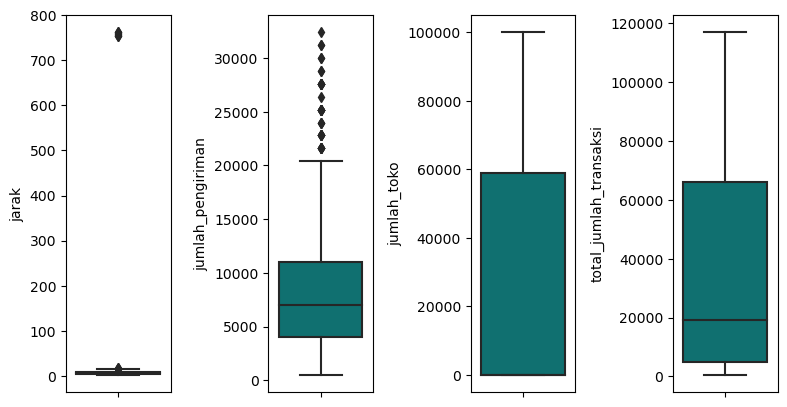

In [32]:
plt.figure(figsize=(10,20))

feat_num = df2.select_dtypes(include=[np.number]).columns.tolist()

for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df2[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

## Transformasi Log

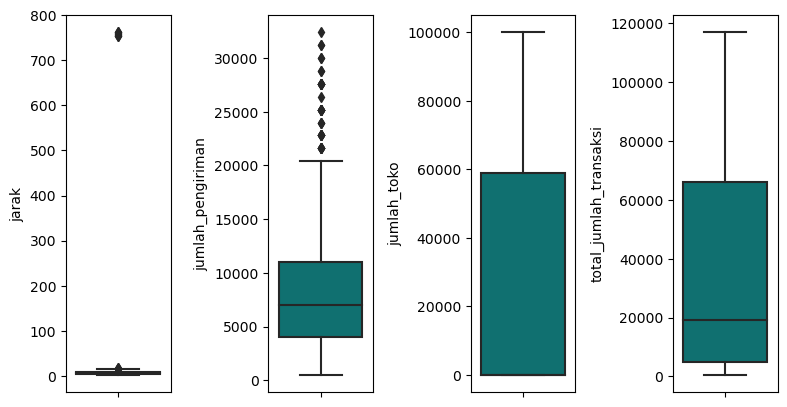

In [33]:
plt.figure(figsize=(10,20))

# plotting
for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df2[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

## Imputasi Outlier

In [34]:
def impute_outliers(df2):
    float_cols = df2.select_dtypes(include=['float64']).columns.tolist()
    int_cols = df2.select_dtypes(include=['int64']).columns.tolist()
    
    # Menghapus nilai outlier pada setiap atribut
    for col in float_cols + int_cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        if col in float_cols:
            df2.loc[df2[col] < lower_bound, col] = df2[col].mean()
            df2.loc[df2[col] > upper_bound, col] = df2[col].mean()
        elif col in int_cols:
            df2.loc[df2[col] < lower_bound, col] = df2[col].mean()
            df2.loc[df2[col] > upper_bound, col] = df2[col].mean()
    
    return df2

df2 = impute_outliers(df2)

## Normalisasi Data

In [35]:
scaler = MinMaxScaler()
num_df_transform = pd.DataFrame(scaler.fit_transform(df2[feat_num]), columns=feat_num)

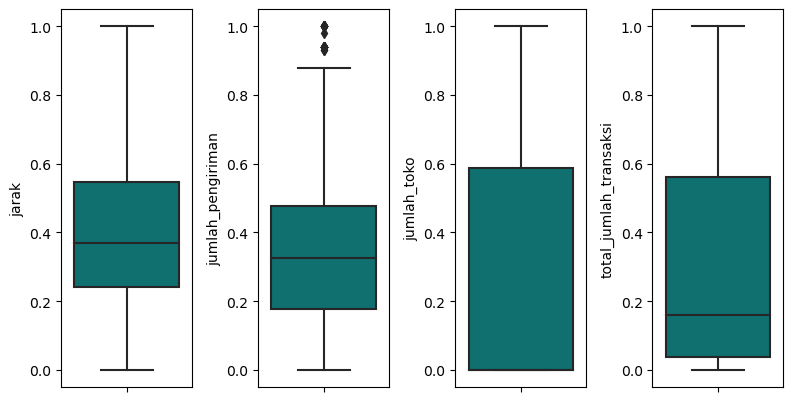

In [36]:
plt.figure(figsize=(10,20))
num_df_column = num_df_transform.columns
# plotting
for i in range(0, len(num_df_column)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=num_df_transform[num_df_column[i]],color='teal', orient='v')
    plt.tight_layout()

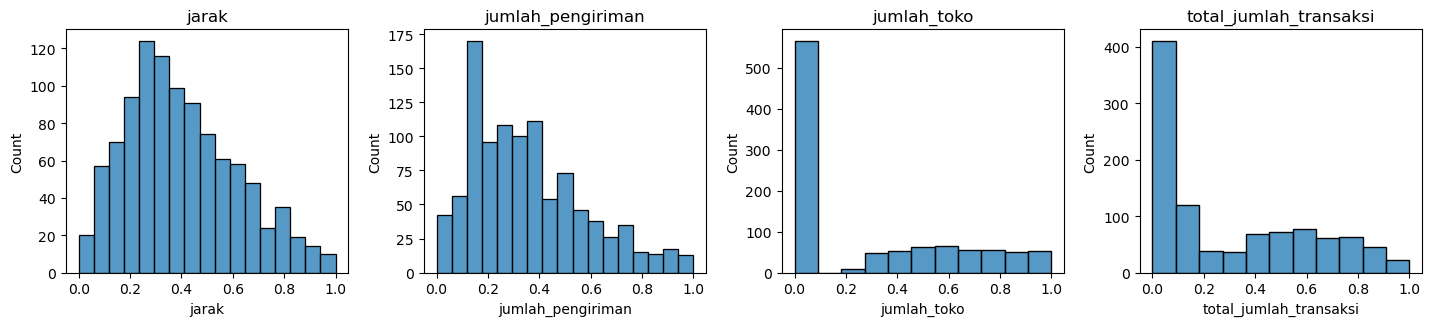

In [37]:
plt.figure(figsize=(18,15))

for i, var in enumerate(num_df_column):
    plt.subplot(5, 5, i+1)
    sns.histplot(num_df_transform[var])
    plt.title(var)

plt.tight_layout()
plt.show()

# EKSPLORASI DATA

In [38]:
# Memperoleh deskripsi statistik dari kolom-kolom yang memiliki tipe data objek/string.
df2.describe(include="O")

,mode,dari_latlng,ke_latlng,jenis_kelamin_pelanggan,jenis_kelamin_pengemudi,jenis_kendaraan,merk_kendaraan
count,1014,1014,1014,1014,1014,1014,1014
unique,4,641,1014,2,2,2,11
top,BIKE,"-0,008582,109,361511","-0,061345224,109,305406",P,L,MOTOR,BMW
freq,324,26,1,528,725,773,216


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mode                     1014 non-null   object 
 1   dari_latlng              1014 non-null   object 
 2   ke_latlng                1014 non-null   object 
 3   jarak                    1014 non-null   float64
 4   jumlah_pengiriman        1014 non-null   float64
 5   jumlah_toko              1014 non-null   float64
 6   total_jumlah_transaksi   1014 non-null   float64
 7   jenis_kelamin_pelanggan  1014 non-null   object 
 8   jenis_kelamin_pengemudi  1014 non-null   object 
 9   jenis_kendaraan          1014 non-null   object 
 10  merk_kendaraan           1014 non-null   object 
dtypes: float64(4), object(7)
memory usage: 95.1+ KB


In [40]:
df2['jenis_kendaraan'].value_counts()

MOTOR    773
MOBIL    241
Name: jenis_kendaraan, dtype: int64

In [41]:
# Melihat persentase jumlah masing-masing merek
datamerk = pd.DataFrame({"Total":df2['jenis_kendaraan'].value_counts(), 
                          "Presentase":(df2['jenis_kendaraan'].value_counts()/df2.shape[0])*100})
datamerk

,Total,Presentase
MOTOR,773,76.232742
MOBIL,241,23.767258


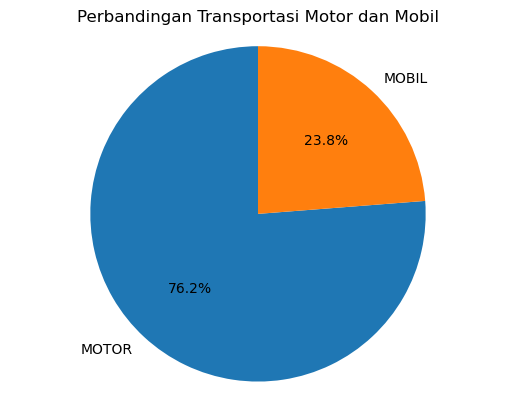

In [42]:
# Visualisasi data dengan pie chart
jumlah = datamerk['Total']
label = ['MOTOR','MOBIL']

plt.pie(jumlah, labels=label, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Perbandingan Transportasi Motor dan Mobil')
plt.show()

# DATA PREPROCECING

In [43]:
df2.drop(columns=['dari_latlng','ke_latlng'], inplace=True)

In [44]:
# Memperbarui list atribut bertipe numerik dan kategorik
categorical = [i for i in df2.columns if df2[i].dtypes == 'O']
numerical = [i for i in df2.columns if i not in categorical] 
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['mode', 'jenis_kelamin_pelanggan', 'jenis_kelamin_pengemudi', 'jenis_kendaraan', 'merk_kendaraan']
numerical : ['jarak', 'jumlah_pengiriman', 'jumlah_toko', 'total_jumlah_transaksi']


In [45]:
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df2[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [46]:
df2['jenis_kelamin_pelanggan'].replace(encode_data('jenis_kelamin_pelanggan'),inplace = True)

{'P': 0, 'L': 1}


In [47]:
df2['jenis_kelamin_pengemudi'].replace(encode_data('jenis_kelamin_pengemudi'),inplace = True)

{'L': 0, 'P': 1}


In [48]:
df2['jenis_kendaraan'].replace(encode_data('jenis_kendaraan'),inplace = True)

{'MOTOR': 0, 'MOBIL': 1}


In [49]:
df2['merk_kendaraan'].replace(encode_data('merk_kendaraan'),inplace = True)

{'Yamaha': 0, 'BMW': 1, 'TVS': 2, 'Suzuki': 3, 'Honda': 4, 'Toyota': 5, 'Kawasaki': 6, 'Mitsubishi': 7, 'KIA': 8, 'Volvo': 9, 'Audi': 10}


In [50]:
df2['mode'].replace(encode_data('mode'),inplace = True)

{'BIKE': 0, 'FOOD': 1, 'SHOP': 2, 'CAR': 3}


In [51]:
# scaler = MinMaxScaler()
# scaled_jarak = scaler.fit_transform(df2[['jarak']])
# df2['jarak'] = scaled_jarak

In [52]:
# scaled_pengiriman = scaler.fit_transform(df2[['jumlah_pengiriman']])
# df2['jumlah_pengiriman'] = scaled_pengiriman

In [53]:
# scaled_toko = scaler.fit_transform(df2[['jumlah_toko']])
# df2['jumlah_toko'] = scaled_toko

In [54]:
# scaled_totaltransaksi = scaler.fit_transform(df2[['total_jumlah_transaksi']])
# df2['total_jumlah_transaksi'] = scaled_toko

In [55]:
df2

,mode,jarak,jumlah_pengiriman,jumlah_toko,total_jumlah_transaksi,jenis_kelamin_pelanggan,jenis_kelamin_pengemudi,jenis_kendaraan,merk_kendaraan
0,0,5.55,2500.0,0.0,2500.0,0,0,0,0
1,1,7.08,9000.0,82000.0,91000.0,1,0,0,1
2,2,4.02,5000.0,58500.0,63500.0,1,0,0,2
3,1,8.94,12000.0,72000.0,84000.0,1,0,0,3
4,3,7.93,14400.0,0.0,14400.0,1,1,1,4
...,...,...,...,...,...,...,...,...,...
1012,0,9.75,5000.0,0.0,5000.0,1,0,0,1
1013,1,7.91,10000.0,35000.0,45000.0,0,0,0,1
1014,1,7.26,9000.0,59000.0,68000.0,1,0,0,2
1015,0,7.50,3500.0,0.0,3500.0,0,0,0,2


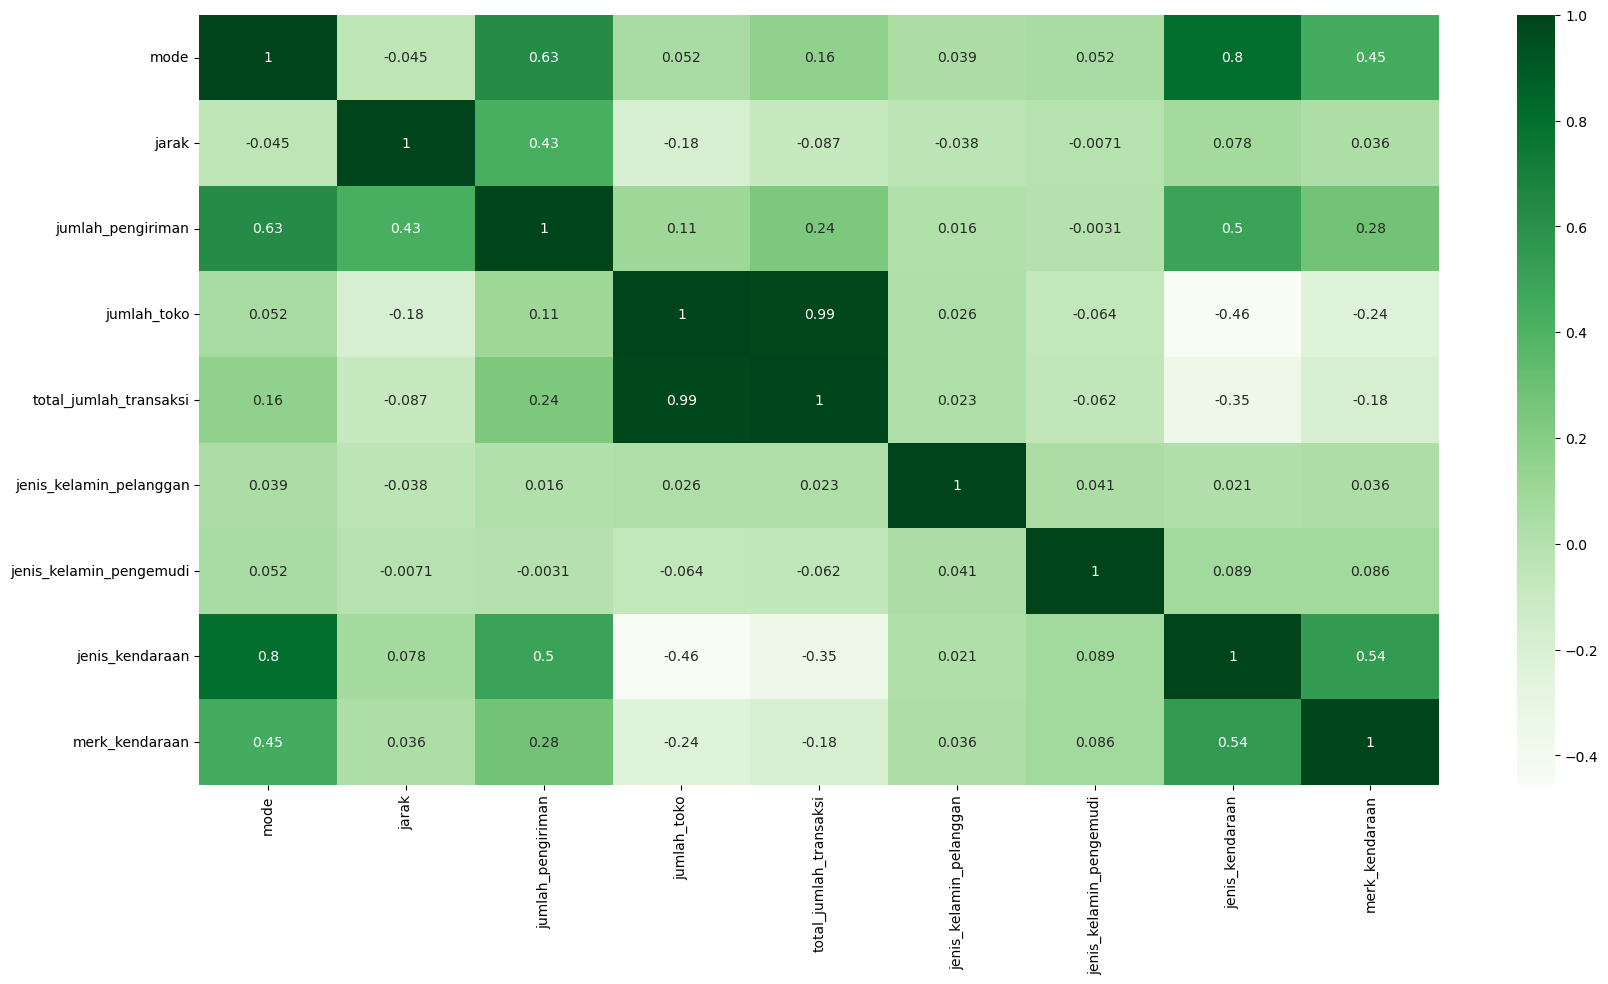

In [56]:
# annot=True digunakan untuk menampilkan nilai korelasi pada setiap kotak pada heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(df2.corr(), annot=True, cmap="Greens")

In [57]:
df2.corr()

,mode,jarak,jumlah_pengiriman,jumlah_toko,total_jumlah_transaksi,jenis_kelamin_pelanggan,jenis_kelamin_pengemudi,jenis_kendaraan,merk_kendaraan
mode,1.000000,-0.044637,0.629345,0.051683,0.162164,0.039395,0.051990,0.802645,0.446072
jarak,-0.044637,1.000000,0.430644,-0.184021,-0.087174,-0.037810,-0.007107,0.078126,0.036132
jumlah_pengiriman,0.629345,0.430644,1.000000,0.107179,0.238958,0.016197,-0.003114,0.498616,0.279235
jumlah_toko,0.051683,-0.184021,0.107179,1.000000,0.986075,0.026118,-0.064028,-0.455511,-0.237853
total_jumlah_transaksi,0.162164,-0.087174,0.238958,0.986075,1.000000,0.022708,-0.062137,-0.349109,-0.180606
jenis_kelamin_pelanggan,0.039395,-0.037810,0.016197,0.026118,0.022708,1.000000,0.041479,0.020829,0.035978
jenis_kelamin_pengemudi,0.051990,-0.007107,-0.003114,-0.064028,-0.062137,0.041479,1.000000,0.088856,0.086179
jenis_kendaraan,0.802645,0.078126,0.498616,-0.455511,-0.349109,0.020829,0.088856,1.000000,0.539607
merk_kendaraan,0.446072,0.036132,0.279235,-0.237853,-0.180606,0.035978,0.086179,0.539607,1.000000


In [58]:
df3 = df2.copy()

In [59]:
df2.shape, df3.shape

((1014, 9), (1014, 9))

In [60]:
# Melakukan inisialisasi variabel X dan y
X = df2.drop(['total_jumlah_transaksi'], axis=1)
y = df2['total_jumlah_transaksi']
print(X.shape)
print(y.shape)

(1014, 8)
(1014,)


In [61]:
bestfeatures = SelectKBest(score_func=f_regression, k=8)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("8 Atribut Terbaik")
print(featureScores.nlargest(8,'Score'))

8 Atribut Terbaik
                     Specs         Score
3              jumlah_toko  35581.129533
6          jenis_kendaraan    140.458450
2        jumlah_pengiriman     61.285630
7           merk_kendaraan     34.122879
0                     mode     27.331575
1                    jarak      7.749368
5  jenis_kelamin_pengemudi      3.922429
4  jenis_kelamin_pelanggan      0.522088


In [62]:
X_fit = pd.concat([df3[['jumlah_toko','jenis_kendaraan','jumlah_pengiriman','merk_kendaraan','mode','jarak']]],axis=1)

In [63]:
X_fit

,jumlah_toko,jenis_kendaraan,jumlah_pengiriman,merk_kendaraan,mode,jarak
0,0.0,0,2500.0,0,0,5.55
1,82000.0,0,9000.0,1,1,7.08
2,58500.0,0,5000.0,2,2,4.02
3,72000.0,0,12000.0,3,1,8.94
4,0.0,1,14400.0,4,3,7.93
...,...,...,...,...,...,...
1012,0.0,0,5000.0,1,0,9.75
1013,35000.0,0,10000.0,1,1,7.91
1014,59000.0,0,9000.0,2,1,7.26
1015,0.0,0,3500.0,2,0,7.50


In [64]:
X_fit.shape

(1014, 6)

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.7 dan 0.3

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size = 0.3, random_state = 1)

In [66]:
# Mengetahui dimensi data train dan data test
print('Dimensi feature data train :', X_train.shape)
print('Dimensi target data train :', y_train.shape)
print('Dimensi feature data test :', X_test.shape)
print('Dimensi target data test :', y_test.shape)

Dimensi feature data train : (709, 6)
Dimensi target data train : (709,)
Dimensi feature data test : (305, 6)
Dimensi target data test : (305,)


# PENDEFINISIAN MODEL

In [67]:
lr_i = LinearRegression()
rfr = RandomForestRegressor(n_estimators = 56, random_state = 14)

# PELATIHAN MODEL

In [68]:
lm_1 = lr_i.fit(X_train, y_train)
rfr_model = rfr.fit(X_train, y_train)

# EVALUASI MODEL

Linear Regression train R Squared  =  0.9958702794770201
Linear Regression test R Squared   =  0.9948206874724614
Linear Regression test RMSE        =  2428.0115413830813


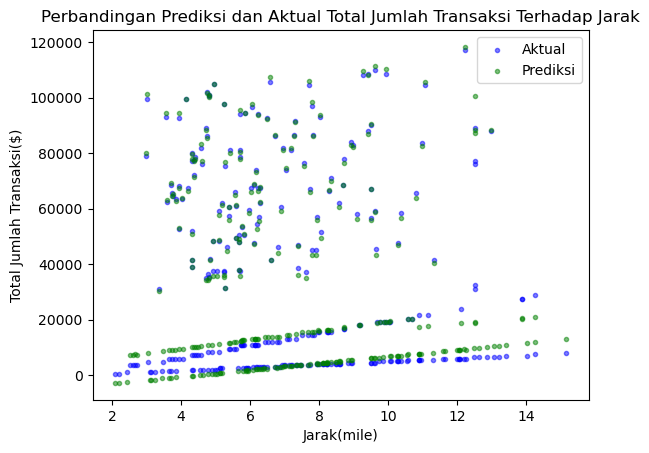

In [69]:
#  MODEL 1 LinearRegression

y_pred = lm_1.predict(X_test)

## R-squared data train
lr_train_r2 = lr_i.score(X_train,y_train)
## R-squared data test
lr_test_r2 = lr_i.score(X_test, y_test)

print('Linear Regression train R Squared  = ', lr_train_r2)
print('Linear Regression test R Squared   = ', lr_test_r2)

## Root mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('Linear Regression test RMSE        = ', lr_rmse)

x_axis = X_test.jarak

## Scatter plot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'g', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Total Jumlah Transaksi($)') 
plt.title("Perbandingan Prediksi dan Aktual Total Jumlah Transaksi Terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

Random Forest train R Squared  = 1.000
Random Forest test R Squared   = 0.999
Random Forest test RMSE        = 975.731


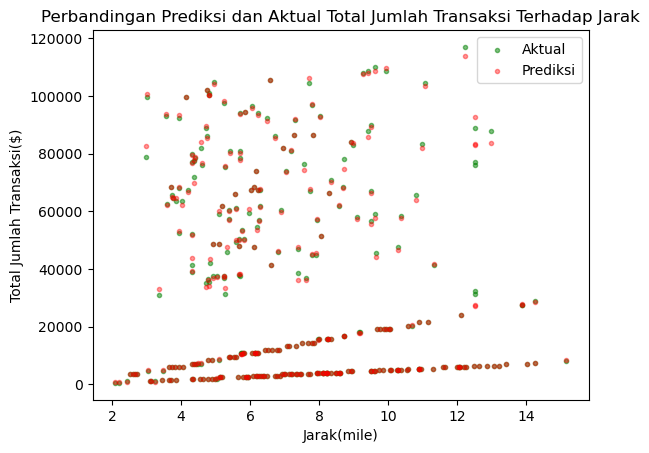

In [71]:
# MODEL 2 RandomForestRegressor

y_pred = rfr.predict(X_test)
## R-squared data train
rf_train_r2 = rfr_model.score(X_train,y_train)
## R-squared data test
rf_test_r2 = rfr_model.score(X_test, y_test)

print('Random Forest train R Squared  = %.3f' % rf_train_r2)
print('Random Forest test R Squared   = %.3f' % rf_test_r2)

## Root mean squared error
rf_rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('Random Forest test RMSE        = %.3f' % rf_rmse)

x_axis = X_test.jarak 

## Scatter plot
plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.4, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak(mile)')
plt.ylabel('Total Jumlah Transaksi($)') 
plt.title("Perbandingan Prediksi dan Aktual Total Jumlah Transaksi Terhadap Jarak")
plt.legend(loc = 'upper right')
plt.show()

dikarenakan nilai RMSE yang masih besar kita perlu menggunakan validasi silang (cross-validation).

In [107]:
lmbaru = regression_model.fit(X_train, y_train) 

# Melakukan validasi silang dengan model regresi linear
cross_val_scores = cross_val_score(lm_1, X, y, cv=3, scoring='neg_mean_squared_error')

# Menghitung rata-rata RMSE dari skor validasi silang
rmse_scores = np.sqrt(-cross_val_scores)
mean_rmse = np.mean(rmse_scores)

# Menampilkan RMSE dan R-squared
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean Cross-Validation RMSE:", mean_rmse)

Cross-Validation RMSE Scores: [1.77635684e-15 0.00000000e+00 7.10542736e-15]
Mean Cross-Validation RMSE: 2.960594732333751e-15


In [112]:
rfrbaru = rfr.fit(X_train, y_train) 

# Melakukan validasi silang dengan model regresi linear
cross_val_scores = cross_val_score(rfr_model, X, y, cv=3, scoring='neg_mean_squared_error')

# Menghitung rata-rata RMSE dari skor validasi silang
rmse_scores = np.sqrt(-cross_val_scores)
mean_rmse = np.mean(rmse_scores)

# Menampilkan RMSE dan R-squared
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean Cross-Validation RMSE:", mean_rmse)

Cross-Validation RMSE Scores: [12.32142857  5.35714286 13.57142857]
Mean Cross-Validation RMSE: 10.416666666666668


Berdasarkan nilai evaluasi di atas, Kedua model memiliki nilai R Squared yang cukup tinggi yaitu 0.99 dan 1.00, yang menunjukkan model cukup baik dalam menjelaskan variabilitas data. Namun, nilai RMSE pada kedua model memiliki nilai yang sangat besar oleh karena itu perlu dilakukan validasi silang. Mean Cross-Validation RMSE linear regression sebesar 2.9 sedangkan RandomForestRegressor sebesar 10.4.

# MODEL INFERENCE

In [72]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1016
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jumlah_toko        1014 non-null   float64
 1   jenis_kendaraan    1014 non-null   int64  
 2   jumlah_pengiriman  1014 non-null   float64
 3   merk_kendaraan     1014 non-null   int64  
 4   mode               1014 non-null   int64  
 5   jarak              1014 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 55.5 KB


In [115]:
data = {
   'jumlah_toko': ['90000', '100000', '250000', '500000', '135000'],
   'jenis_kendaraan': ['1', '2', '1', '1', '2'],
   'jumlah_pengiriman': [2500, 3000, 10000, 20000, 4000],
   'merk_kendaraan': [1, 2, 3, 4, 5],
   'mode': [1, 1, 2, 2, 1],
   'jarak': [7, 10, 11, 5, 4]
}

X_new = pd.DataFrame(data)

In [116]:
X_new

,jumlah_toko,jenis_kendaraan,jumlah_pengiriman,merk_kendaraan,mode,jarak
0,90000,1,2500,1,1,7
1,100000,2,3000,2,1,10
2,250000,1,10000,3,2,11
3,500000,1,20000,4,2,5
4,135000,2,4000,5,1,4


In [121]:
ypredlmbaru = lmbaru.predict(X_new)
print('Hasil prediksi total harga transaksi baru menggunakan linear regression :')
for prediksi in ypredlmbaru:
    print(prediksi)

Hasil prediksi total harga transaksi baru menggunakan linear regression :
101387.52093541433
119193.44922904743
273812.6579017791
527405.746785108
149035.25074205935


In [122]:
ypredrfrbaru = rfrbaru.predict(X_new)
print('Hasil prediksi total harga transaksi baru menggunakan random forest regressor :')
for prediksi in ypredrfrbaru:
    print(prediksi)

Hasil prediksi total harga transaksi baru menggunakan random forest regressor :
95696.42857142857
108669.64285714286
111464.28571428571
108035.71428571429
103553.57142857143
